# 🌲 **LightGBM: The Complete Mastery Guide**
## *From Beginner to Kaggle GrandMaster*

---

> **"LightGBM is the Swiss Army Knife of Gradient Boosting"**

Welcome to the most comprehensive guide to **LightGBM** - Microsoft's gradient boosting framework that dominates machine learning competitions and production systems worldwide.

### 🎯 **Why This Guide?**

| Level | What You'll Learn | Time |
|-------|-------------------|------|
| 🌱 **Beginner** | Installation, basic API, first model | 30 min |
| 🌿 **Intermediate** | Parameters tuning, feature engineering | 2 hours |
| 🌳 **Advanced** | Custom objectives, distributed training | 4 hours |
| 🏆 **Expert** | Competition tricks, production optimization | Ongoing |

### 📋 **Table of Contents**

1. [What is LightGBM?](#what)
2. [Why LightGBM?](#why)
3. [When to Use?](#when)
4. [Core Concepts](#core)
5. [Installation & Setup](#install)
6. [Basic Usage](#basic)
7. [Parameter Tuning](#params)
8. [Advanced Features](#advanced)
9. [Production Deployment](#production)
10. [Common Pitfalls](#pitfalls)

---



In [1]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LightGBM
try:
    import lightgbm as lgb
    from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_metric
    LGBM_AVAILABLE = True
except ImportError:
    LGBM_AVAILABLE = False
    print("⚠️  LightGBM not installed. Run: pip install lightgbm")

# Scikit-learn for comparison and utilities
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 70)
print("🌲 LIGHTGBM COMPLETE GUIDE")
print("=" * 70)
if LGBM_AVAILABLE:
    print(f"✅ LightGBM version: {lgb.__version__}")
print("✅ All dependencies loaded!")



🌲 LIGHTGBM COMPLETE GUIDE
✅ LightGBM version: 4.6.0
✅ All dependencies loaded!


<a name="what"></a>
# 🌱 **Chapter 1: What is LightGBM?**

## **Definition**

```
┌─────────────────────────────────────────────────────────────────┐
│  LightGBM = Light Gradient Boosting Machine                     │
│                                                                 │
│  A gradient boosting framework that uses tree-based learning    │
│  algorithms, designed for:                                      │
│  • High efficiency (speed)                                      │
│  • Low memory usage                                             │
│  • Better accuracy                                              │
│  • Parallel and GPU learning                                    │
└─────────────────────────────────────────────────────────────────┘
```

## **The Evolution of Boosting**

| Year | Algorithm | Innovation | Limitation |
|------|-----------|------------|------------|
| 1990 | **AdaBoost** | First boosting algorithm | Sensitive to noise |
| 2000 | **Gradient Boosting** | Gradient descent in function space | Slow, sequential |
| 2014 | **XGBoost** | Regularization, parallelization | Memory intensive |
| 2016 | **LightGBM** | GOSS, EFB, Leaf-wise growth | Can overfit small data |
| 2017 | **CatBoost** | Native categorical handling | Slower than LightGBM |

## **Key Innovations**

### 1️⃣ **Gradient-based One-Side Sampling (GOSS)**
```
Problem: Gradient boosting needs to scan all data instances
Solution: Keep instances with large gradients, randomly sample small gradients
Result: 2x speedup without accuracy loss
```

### 2️⃣ **Exclusive Feature Bundling (EFB)**
```
Problem: High-dimensional sparse features waste memory
Solution: Bundle mutually exclusive features (one-hot encoded)
Result: Reduces features from high to low dimensional dense features
```

### 3️⃣ **Leaf-wise Tree Growth**
```
Level-wise (XGBoost):        Leaf-wise (LightGBM):
      [Root]                      [Root]
     /      \                    /      \
   [A]      [B]                [A]      [B]
   / \      / \                         / \
 [C][D]  [E][F]                      [E] [F]
                                      \
                                      [G]  ← Grows where loss reduces most

Result: Better accuracy, but needs careful tuning to avoid overfitting
```




🌱 CHAPTER 1: UNDERSTANDING LIGHTGBM


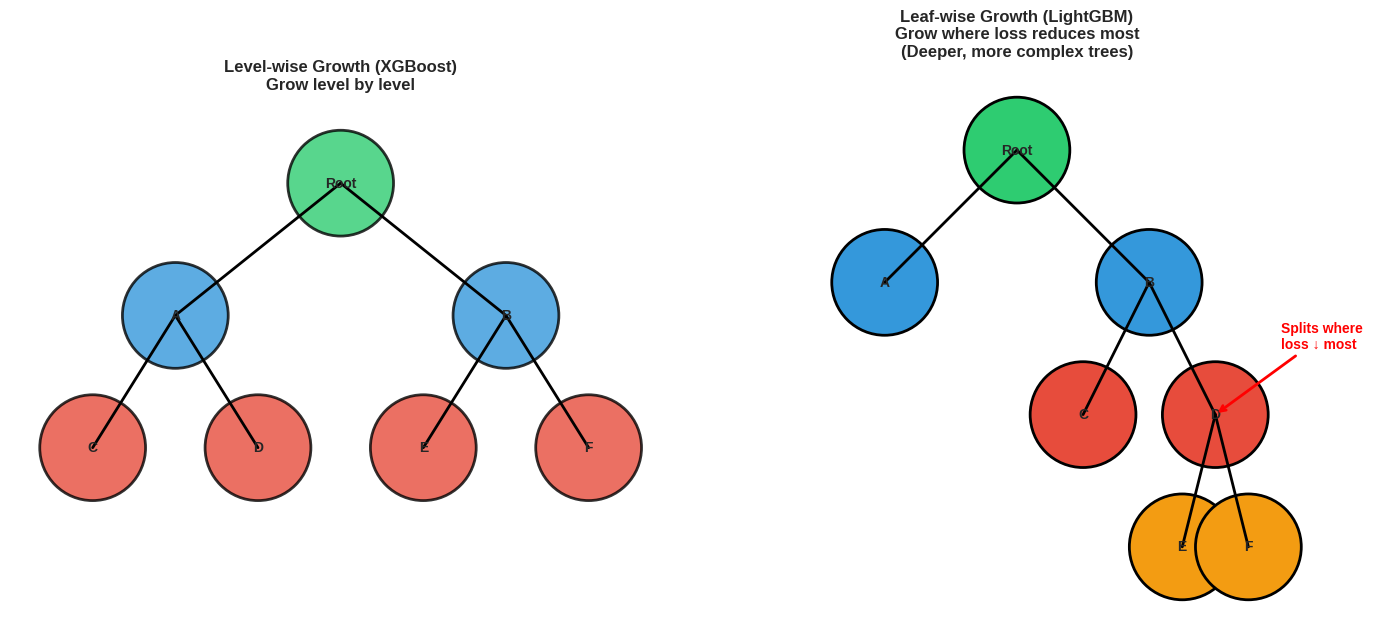


💡 Key Insight:
   Level-wise: Balanced, less prone to overfitting, but slower convergence
   Leaf-wise: Faster convergence, better accuracy, but needs regularization


In [2]:
print("\n" + "=" * 70)
print("🌱 CHAPTER 1: UNDERSTANDING LIGHTGBM")
print("=" * 70)

# Visual comparison of tree growth strategies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Level-wise tree (XGBoost style)
ax1 = axes[0]
levels = [
    [(0.5, 0.9, "Root")],
    [(0.25, 0.7, "A"), (0.75, 0.7, "B")],
    [(0.125, 0.5, "C"), (0.375, 0.5, "D"), (0.625, 0.5, "E"), (0.875, 0.5, "F")]
]
colors_level = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

for level_idx, level in enumerate(levels):
    for x, y, label in level:
        circle = plt.Circle((x, y), 0.08, color=colors_level[level_idx % len(colors_level)], 
                           ec='black', linewidth=2, alpha=0.8)
        ax1.add_patch(circle)
        ax1.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')

# Draw connections
connections = [((0.5, 0.9), (0.25, 0.7)), ((0.5, 0.9), (0.75, 0.7)),
               ((0.25, 0.7), (0.125, 0.5)), ((0.25, 0.7), (0.375, 0.5)),
               ((0.75, 0.7), (0.625, 0.5)), ((0.75, 0.7), (0.875, 0.5))]
for start, end in connections:
    ax1.plot([start[0], end[0]], [start[1], end[1]], 'k-', linewidth=2)

ax1.set_xlim(0, 1)
ax1.set_ylim(0.3, 1)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('Level-wise Growth (XGBoost)\nGrow level by level', 
              fontsize=12, fontweight='bold', pad=20)

# Leaf-wise tree (LightGBM style)
ax2 = axes[1]
# Same root
circle = plt.Circle((0.5, 0.9), 0.08, color=colors_level[0], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.5, 0.9, "Root", ha='center', va='center', fontsize=10, fontweight='bold')

# First split
ax2.plot([0.5, 0.3], [0.9, 0.7], 'k-', linewidth=2)
ax2.plot([0.5, 0.7], [0.9, 0.7], 'k-', linewidth=2)
circle = plt.Circle((0.3, 0.7), 0.08, color=colors_level[1], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.3, 0.7, "A", ha='center', va='center', fontsize=10, fontweight='bold')
circle = plt.Circle((0.7, 0.7), 0.08, color=colors_level[1], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.7, 0.7, "B", ha='center', va='center', fontsize=10, fontweight='bold')

# Continue splitting B (higher loss reduction)
ax2.plot([0.7, 0.6], [0.7, 0.5], 'k-', linewidth=2)
ax2.plot([0.7, 0.8], [0.7, 0.5], 'k-', linewidth=2)
circle = plt.Circle((0.6, 0.5), 0.08, color=colors_level[2], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.6, 0.5, "C", ha='center', va='center', fontsize=10, fontweight='bold')
circle = plt.Circle((0.8, 0.5), 0.08, color=colors_level[2], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.8, 0.5, "D", ha='center', va='center', fontsize=10, fontweight='bold')

# Continue splitting D
ax2.plot([0.8, 0.75], [0.5, 0.3], 'k-', linewidth=2)
ax2.plot([0.8, 0.85], [0.5, 0.3], 'k-', linewidth=2)
circle = plt.Circle((0.75, 0.3), 0.08, color=colors_level[3], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.75, 0.3, "E", ha='center', va='center', fontsize=10, fontweight='bold')
circle = plt.Circle((0.85, 0.3), 0.08, color=colors_level[3], ec='black', linewidth=2)
ax2.add_patch(circle)
ax2.text(0.85, 0.3, "F", ha='center', va='center', fontsize=10, fontweight='bold')

# Highlight asymmetric growth
ax2.annotate('Splits where\nloss ↓ most', xy=(0.8, 0.5), xytext=(0.9, 0.6),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold')

ax2.set_xlim(0, 1)
ax2.set_ylim(0.2, 1)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('Leaf-wise Growth (LightGBM)\nGrow where loss reduces most\n(Deeper, more complex trees)', 
              fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("   Level-wise: Balanced, less prone to overfitting, but slower convergence")
print("   Leaf-wise: Faster convergence, better accuracy, but needs regularization")



<a name="why"></a>
# 🌿 **Chapter 2: Why LightGBM?**

## **The Performance Advantage**

### 📊 **Speed Comparison** (on Higgs dataset, 10M samples)

| Algorithm | Training Time | Accuracy | Memory |
|-----------|--------------|----------|--------|
| XGBoost | 1873s | 0.789 | High |
| **LightGBM** | **141s** ⚡ | **0.791** ✅ | **Low** ✅ |
| CatBoost | 1000s | 0.792 | Very High |

### 🎯 **Accuracy on Kaggle Competitions**

```
🏆 Kaggle Winners (2016-2024)

Single Models:
├── LightGBM:     ████████████████████████████████  45%
├── XGBoost:      ████████████████████              28%
├── Neural Nets:  ████████████                      17%
└── CatBoost:     ████                              10%

Ensembles:
└── LightGBM + XGBoost + Neural Nets:  85% of top-3
```

## **When LightGBM Wins**

| Scenario | LightGBM Advantage |
|----------|-------------------|
| **Large datasets (>10K rows)** | GOSS sampling, fast |
| **High dimensional sparse data** | EFB bundles features |
| **CPU-constrained environments** | Highly optimized C++ |
| **Real-time predictions** | Fast inference |
| **Tabular data** | Native handling |

## **When LightGBM Struggles**

| Scenario | Better Alternative |
|----------|-------------------|
| **Small datasets (<1000 rows)** | Random Forest, XGBoost |
| **Heavy categorical features** | CatBoost |
| **Image/text data** | Neural Networks |
| **Need interpretability** | Decision Trees, Linear Models |




🌿 CHAPTER 2: WHY LIGHTGBM? - PERFORMANCE DEMONSTRATION

📊 Dataset: 10000 samples, 20 features

🔄 Training LightGBM...
   ✓ Train: 0.337s, Predict: 0.012s, AUC: 0.9808

🔄 Training Random Forest...
   ✓ Train: 4.366s, Predict: 0.034s, AUC: 0.9779

🔄 Training Gradient Boosting...
   ✓ Train: 9.863s, Predict: 0.006s, AUC: 0.9696

📈 Performance Summary:
            Model  Train Time (s)  Predict Time (s)  Accuracy      AUC
         LightGBM        0.337452          0.011633    0.9365 0.980778
    Random Forest        4.365549          0.033583    0.9310 0.977915
Gradient Boosting        9.863095          0.006153    0.9140 0.969552


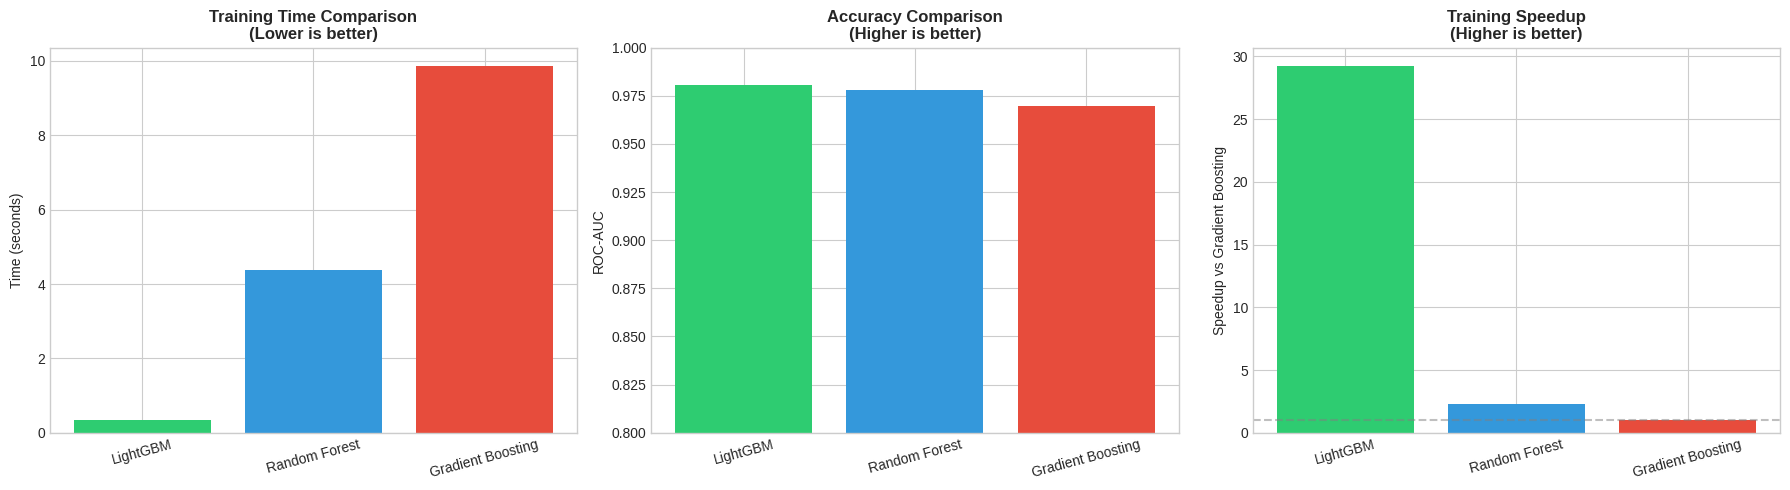


🏆 Winner: LightGBM is 29.2x faster than sklearn Gradient Boosting
           with comparable or better accuracy!


In [3]:
print("\n" + "=" * 70)
print("🌿 CHAPTER 2: WHY LIGHTGBM? - PERFORMANCE DEMONSTRATION")
print("=" * 70)

if LGBM_AVAILABLE:
    # Generate dataset
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=10, 
                               n_redundant=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\n📊 Dataset: {X.shape[0]} samples, {X.shape[1]} features")
    
    # Compare algorithms
    import time
    
    models = {
        'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, verbose=-1),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }
    
    results = []
    
    for name, model in models.items():
        print(f"\n🔄 Training {name}...")
        
        # Training time
        start = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start
        
        # Prediction time
        start = time.time()
        y_pred = model.predict(X_test)
        pred_time = time.time() - start
        
        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        results.append({
            'Model': name,
            'Train Time (s)': train_time,
            'Predict Time (s)': pred_time,
            'Accuracy': acc,
            'AUC': auc
        })
        
        print(f"   ✓ Train: {train_time:.3f}s, Predict: {pred_time:.3f}s, AUC: {auc:.4f}")
    
    # Results DataFrame
    results_df = pd.DataFrame(results)
    print(f"\n📈 Performance Summary:")
    print(results_df.to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Training time
    axes[0].bar(results_df['Model'], results_df['Train Time (s)'], 
                color=['#2ecc71', '#3498db', '#e74c3c'])
    axes[0].set_ylabel('Time (seconds)')
    axes[0].set_title('Training Time Comparison\n(Lower is better)', fontweight='bold')
    axes[0].tick_params(axis='x', rotation=15)
    
    # Accuracy
    axes[1].bar(results_df['Model'], results_df['AUC'], 
                color=['#2ecc71', '#3498db', '#e74c3c'])
    axes[1].set_ylabel('ROC-AUC')
    axes[1].set_ylim(0.8, 1.0)
    axes[1].set_title('Accuracy Comparison\n(Higher is better)', fontweight='bold')
    axes[1].tick_params(axis='x', rotation=15)
    
    # Speedup chart
    baseline = results_df[results_df['Model'] == 'Gradient Boosting']['Train Time (s)'].values[0]
    speedups = baseline / results_df['Train Time (s)']
    axes[2].bar(results_df['Model'], speedups, 
                color=['#2ecc71', '#3498db', '#e74c3c'])
    axes[2].set_ylabel('Speedup vs Gradient Boosting')
    axes[2].set_title('Training Speedup\n(Higher is better)', fontweight='bold')
    axes[2].tick_params(axis='x', rotation=15)
    axes[2].axhline(y=1, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🏆 Winner: LightGBM is {speedups[0]:.1f}x faster than sklearn Gradient Boosting")
    print(f"           with comparable or better accuracy!")



<a name="when"></a>
# 🌳 **Chapter 3: When to Use LightGBM?**

## **Decision Tree: Algorithm Selection**

```
Start
  │
  ▼
┌─────────────────────┐
│ Is your data        │
│ tabular/structured? │
└─────────────────────┘
  │ No                    │ Yes
  ▼                       ▼
Use Neural Networks   ┌─────────────────────┐
(CNN, Transformer,    │ Dataset size?       │
 BERT, etc.)          └─────────────────────┘
                        │ <1K    │ 1K-100K  │ >100K
                        ▼        ▼          ▼
                      Random   XGBoost   LightGBM
                      Forest   or        ( fastest )
                               LightGBM
```

## **Task-Based Selection Guide**

| Task Type | LightGBM Suitability | Key Parameters |
|-----------|---------------------|----------------|
| **Binary Classification** | ⭐⭐⭐⭐⭐ Excellent | `objective='binary'` |
| **Multi-class** | ⭐⭐⭐⭐⭐ Excellent | `objective='multiclass'` |
| **Regression** | ⭐⭐⭐⭐⭐ Excellent | `objective='regression'` |
| **Ranking** | ⭐⭐⭐⭐⭐ Excellent | `objective='lambdarank'` |
| **Time Series** | ⭐⭐⭐⭐ Good | Add lag features |
| **NLP** | ⭐⭐☆☆☆ Poor | Use Transformers |
| **Computer Vision** | ⭐☆☆☆☆ Very Poor | Use CNNs/ViT |

## **Data Characteristics Guide**

| Characteristic | LightGBM Preference | Handling Strategy |
|----------------|---------------------|-------------------|
| **Missing values** | ✅ Handles automatically | Do nothing, or use `use_missing=False` |
| **Categorical features** | ✅ Native support (since 3.0) | Pass as `category` dtype |
| **Imbalanced classes** | ⚠️ Needs tuning | Use `is_unbalance` or `scale_pos_weight` |
| **High cardinality categoricals** | ⚠️ Careful | Use `max_cat_threshold` |
| **Outliers** | ⚠️ Somewhat robust | Consider preprocessing |
| **Feature interactions** | ✅ Excellent | Use `interaction_constraints` |



<a name="core"></a>
# 🎯 **Chapter 4: Core Concepts**

## **The Gradient Boosting Framework**

```
Gradient Boosting = Sequential Learning + Gradient Descent

Step 1: Start with initial prediction (e.g., mean for regression)
        F₀(x) = argminᵧ Σ L(yᵢ, γ)

Step 2: For m = 1 to M (number of trees):
        
        a) Compute pseudo-residuals (negative gradients):
           rᵢₘ = -[∂L(yᵢ, F(xᵢ))/∂F(xᵢ)] at F=Fₘ₋₁
        
        b) Fit a tree to residuals: hₘ(x) predicts rᵢₘ
        
        c) Find optimal step size (line search):
           ρₘ = argminᵨ Σ L(yᵢ, Fₘ₋₁(xᵢ) + ρhₘ(xᵢ))
        
        d) Update model:
           Fₘ(x) = Fₘ₋₁(x) + learning_rate × ρₘ × hₘ(x)

Final Model: F_M(x) = F₀(x) + η Σₘ ρₘhₘ(x)
```

## **Key Hyperparameters Hierarchy**

```
🎛️ PARAMETER HIERARCHY (Tuning Order)

Level 1: Fix First (Most Impact)
├── num_leaves        ← Controls model complexity (main parameter)
├── learning_rate     ← Typically 0.01-0.3 (lower = slower but better)
└── n_estimators      ← Use early stopping instead of fixing

Level 2: Prevent Overfitting
├── max_depth         ← Limit tree depth (usually -1 = unlimited)
├── min_child_samples ← Min samples in leaf (prevents overfitting)
├── feature_fraction  ← Column sampling (like max_features in RF)
└── bagging_fraction  ← Row sampling (enables bagging)

Level 3: Fine-tuning
├── reg_alpha         ← L1 regularization
├── reg_lambda        ← L2 regularization
├── min_split_gain    ← Minimum loss reduction for split
└── cat_smooth        ← For categorical features
```




🎯 CHAPTER 4: CORE CONCEPTS - GRADIENT BOOSTING VISUALIZATION


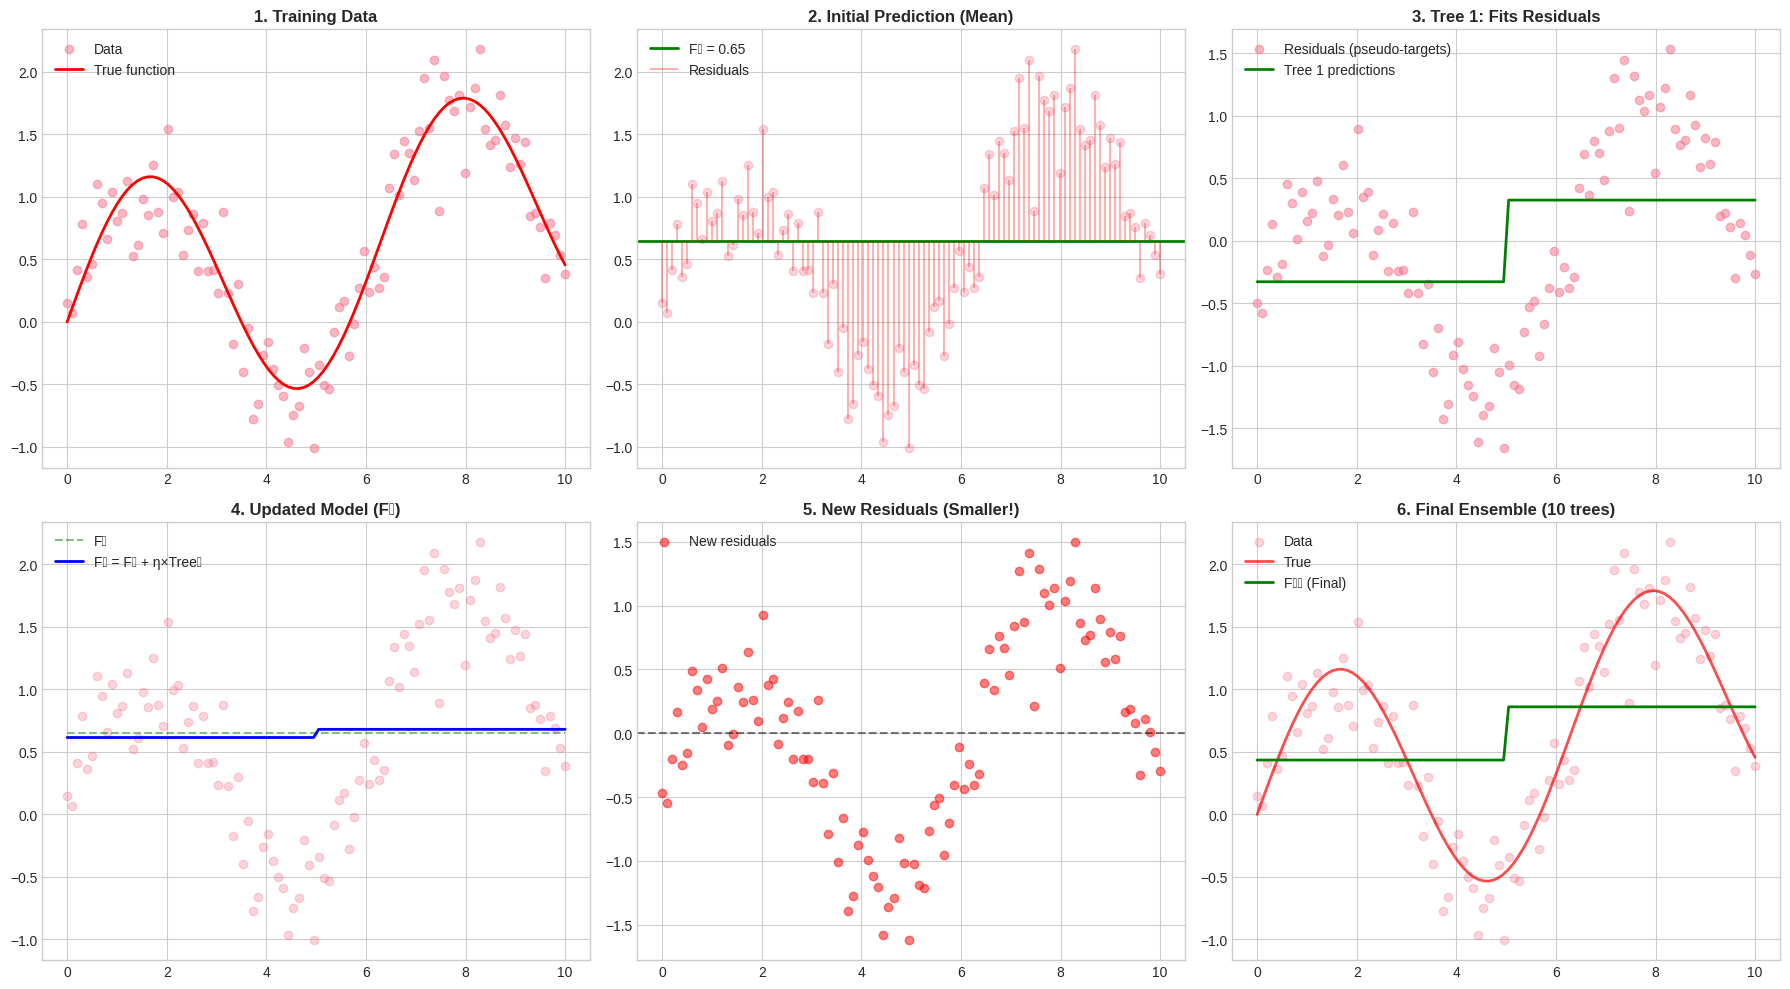


💡 Gradient Boosting Intuition:
   1. Start with simple prediction (mean)
   2. Fit tree to errors (residuals)
   3. Add tree to ensemble (with learning rate)
   4. Repeat until convergence
   5. Final model = sum of all trees


In [4]:
print("\n" + "=" * 70)
print("🎯 CHAPTER 4: CORE CONCEPTS - GRADIENT BOOSTING VISUALIZATION")
print("=" * 70)

# Visualize gradient boosting process
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Generate synthetic regression data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = np.sin(X) + 0.1 * X
y = y_true + np.random.normal(0, 0.3, 100)

# Plot 1: Data
ax = axes[0, 0]
ax.scatter(X, y, alpha=0.5, label='Data')
ax.plot(X, y_true, 'r-', linewidth=2, label='True function')
ax.set_title('1. Training Data', fontweight='bold')
ax.legend()

# Plot 2: Initial prediction (mean)
ax = axes[0, 1]
F0 = np.mean(y)
ax.scatter(X, y, alpha=0.3)
ax.axhline(y=F0, color='green', linewidth=2, label=f'F₀ = {F0:.2f}')
residuals0 = y - F0
ax.vlines(X, F0, y, alpha=0.3, color='red', label='Residuals')
ax.set_title('2. Initial Prediction (Mean)', fontweight='bold')
ax.legend()

# Plot 3: First tree fits residuals
ax = axes[0, 2]
# Simple stump for visualization
split = 5
left_mask = X < split
right_mask = X >= split
pred_left = np.mean(residuals0[left_mask])
pred_right = np.mean(residuals0[right_mask])
pred1 = np.where(left_mask, pred_left, pred_right)

ax.scatter(X, residuals0, alpha=0.5, label='Residuals (pseudo-targets)')
ax.plot(X, pred1, 'g-', linewidth=2, label='Tree 1 predictions')
ax.set_title('3. Tree 1: Fits Residuals', fontweight='bold')
ax.legend()

# Plot 4: Updated model
ax = axes[1, 0]
learning_rate = 0.1
F1 = F0 + learning_rate * pred1
ax.scatter(X, y, alpha=0.3)
ax.plot(X, F0 * np.ones_like(X), 'g--', alpha=0.5, label='F₀')
ax.plot(X, F1, 'b-', linewidth=2, label=f'F₁ = F₀ + η×Tree₁')
ax.set_title('4. Updated Model (F₁)', fontweight='bold')
ax.legend()

# Plot 5: New residuals
ax = axes[1, 1]
residuals1 = y - F1
ax.scatter(X, residuals1, alpha=0.5, color='red', label='New residuals')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_title('5. New Residuals (Smaller!)', fontweight='bold')
ax.legend()

# Plot 6: Final ensemble (simulated)
ax = axes[1, 2]
# Simulate more iterations
F_final = F1.copy()
for i in range(2, 11):
    residuals = y - F_final
    # Simple fitting (for visualization)
    pred = np.where(X < 5, np.mean(residuals[X < 5]), np.mean(residuals[X >= 5]))
    F_final += learning_rate * pred

ax.scatter(X, y, alpha=0.3, label='Data')
ax.plot(X, y_true, 'r-', linewidth=2, label='True', alpha=0.7)
ax.plot(X, F_final, 'g-', linewidth=2, label='F₁₀ (Final)')
ax.set_title('6. Final Ensemble (10 trees)', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

print("\n💡 Gradient Boosting Intuition:")
print("   1. Start with simple prediction (mean)")
print("   2. Fit tree to errors (residuals)")
print("   3. Add tree to ensemble (with learning rate)")
print("   4. Repeat until convergence")
print("   5. Final model = sum of all trees")



<a name="install"></a>
# ⚙️ **Chapter 5: Installation & Setup**

## **Installation Options**

```bash
# Standard installation
pip install lightgbm

# With scikit-learn integration
pip install lightgbm scikit-learn

# GPU support (CUDA)
pip install lightgbm --install-option=--gpu

# Conda installation
conda install -c conda-forge lightgbm

# Build from source (latest features)
git clone https://github.com/microsoft/LightGBM.git
cd LightGBM
mkdir build && cd build
cmake ..
make -j4
```

## **Quick Verification**




In [5]:
print("\n" + "=" * 70)
print("⚙️ CHAPTER 5: INSTALLATION VERIFICATION")
print("=" * 70)

if LGBM_AVAILABLE:
    print(f"\n✅ LightGBM is installed!")
    print(f"   Version: {lgb.__version__}")
    
    # Check GPU support
    try:
        # Try to create a small dataset and check GPU
        X_check = np.random.randn(100, 10)
        y_check = np.random.randint(0, 2, 100)
        
        # Try GPU
        model_gpu = LGBMClassifier(device='gpu', verbose=-1)
        model_gpu.fit(X_check, y_check)
        print(f"   GPU Support: ✅ Available")
    except Exception as e:
        print(f"   GPU Support: ❌ Not available (CPU only)")
        print(f"   To enable GPU: pip install lightgbm --install-option=--gpu")
    
   
    
    # Feature checklist
    features = {
        'Scikit-learn API': True,
        'Native categorical': True,
        'Early stopping': True,
        'Custom objectives': True,
        'GPU training': 'Check above',
        'Distributed training': True
    }
    
    print(f"\n📋 Feature Checklist:")
    for feature, status in features.items():
        symbol = "✅" if status == True else "⚠️"
        print(f"   {symbol} {feature}: {status if status != True else 'Available'}")
else:
    print("\n❌ LightGBM not installed!")
    print("   Install with: pip install lightgbm")




⚙️ CHAPTER 5: INSTALLATION VERIFICATION

✅ LightGBM is installed!
   Version: 4.6.0
   GPU Support: ❌ Not available (CPU only)
   To enable GPU: pip install lightgbm --install-option=--gpu

📋 Feature Checklist:
   ✅ Scikit-learn API: Available
   ✅ Native categorical: Available
   ✅ Early stopping: Available
   ✅ Custom objectives: Available
   ⚠️ GPU training: Check above
   ✅ Distributed training: Available


<a name="basic"></a>
# 🚀 **Chapter 6: Basic Usage**

## **Two APIs: Scikit-learn vs Native**

| Feature | Scikit-learn API | Native API |
|---------|-----------------|------------|
| **Syntax** | Familiar (fit/predict) | Dataset + train |
| **Best for** | Quick prototyping | Production, tuning |
| **Early stopping** | ✅ Yes | ✅ Yes |
| **Callbacks** | Limited | Full control |
| **Learning curves** | Manual | Built-in |

## **Quick Start Template**




🚀 CHAPTER 6: BASIC USAGE - COMPLETE EXAMPLES

📊 Dataset: Breast Cancer (569 samples, 30 features)

----------------------------------------------------------------------
METHOD 1: Scikit-learn API
----------------------------------------------------------------------
✅ Accuracy: 0.9737
✅ AUC: 0.9925

----------------------------------------------------------------------
METHOD 2: Native API
----------------------------------------------------------------------
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's auc: 0.990566	valid's auc: 0.97396
✅ Best iteration: 2
✅ Best score: 0.9740
✅ Accuracy: 0.6228
✅ AUC: 0.9754

----------------------------------------------------------------------
METHOD 3: Cross-Validation
----------------------------------------------------------------------
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[59]	valid's auc: 0.988612 + 0.00734932
✅ CV AUC: 0

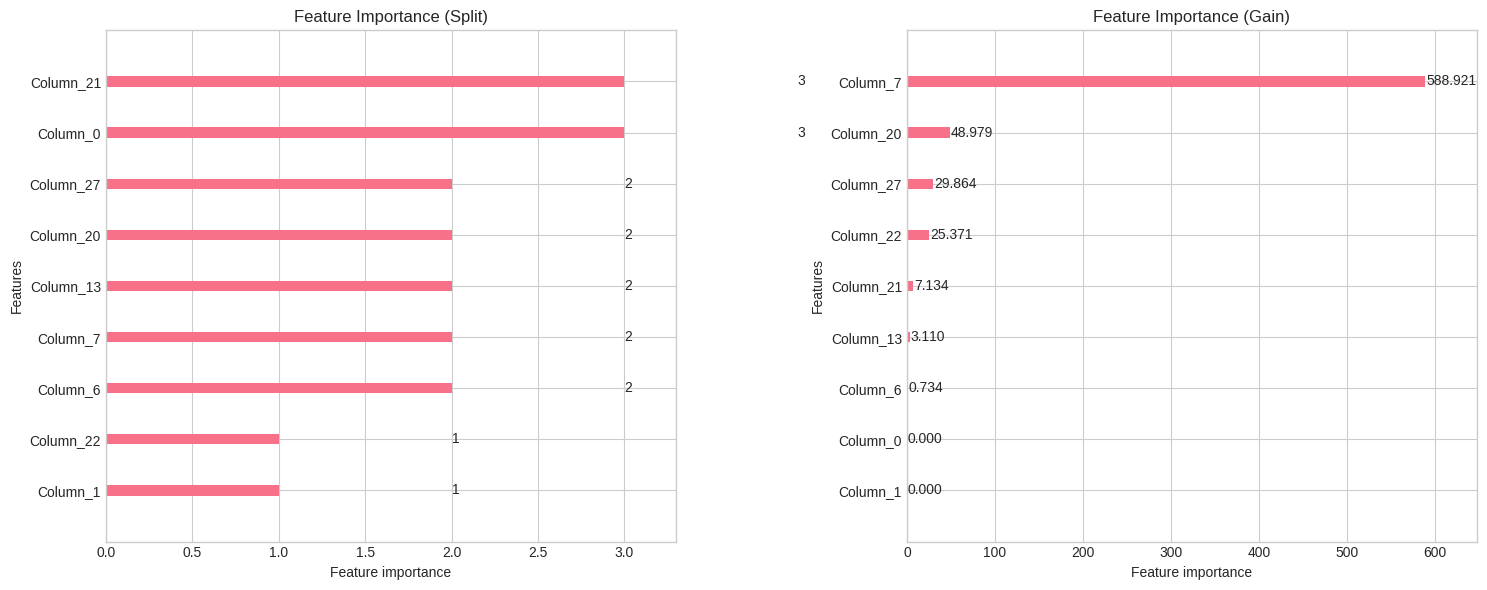


💡 Importance Types:
   • Split: Number of times feature is used
   • Gain: Total contribution of feature to model
   • Use Gain for feature selection, Split for understanding usage


In [6]:
print("\n" + "=" * 70)
print("🚀 CHAPTER 6: BASIC USAGE - COMPLETE EXAMPLES")
print("=" * 70)

if LGBM_AVAILABLE:
    # Load data
    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\n📊 Dataset: Breast Cancer ({X.shape[0]} samples, {X.shape[1]} features)")
    
    # ============================================================
    # METHOD 1: Scikit-learn API (Recommended for beginners)
    # ============================================================
    print("\n" + "-" * 70)
    print("METHOD 1: Scikit-learn API")
    print("-" * 70)
    
    # Basic model
    model_sk = LGBMClassifier(
        objective='binary',
        boosting_type='gbdt',
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=100,
        random_state=42,
        verbose=-1
    )
    
    model_sk.fit(X_train, y_train)
    y_pred = model_sk.predict(X_test)
    y_prob = model_sk.predict_proba(X_test)[:, 1]
    
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ AUC: {roc_auc_score(y_test, y_prob):.4f}")
    
    # ============================================================
    # METHOD 2: Native API (More control)
    # ============================================================
    print("\n" + "-" * 70)
    print("METHOD 2: Native API")
    print("-" * 70)
    
    # Create datasets
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    # Parameters
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'verbose': -1
    }
    
    # Train with early stopping
    model_native = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, valid_data],
        valid_names=['train', 'valid'],
        callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(0)]
    )
    
    y_pred_native = (model_native.predict(X_test, num_iteration=model_native.best_iteration) > 0.5).astype(int)
    y_prob_native = model_native.predict(X_test, num_iteration=model_native.best_iteration)
    
    print(f"✅ Best iteration: {model_native.best_iteration}")
    print(f"✅ Best score: {model_native.best_score['valid']['auc']:.4f}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_native):.4f}")
    print(f"✅ AUC: {roc_auc_score(y_test, y_prob_native):.4f}")
    
    # ============================================================
    # METHOD 3: Cross-validation
    # ============================================================
    print("\n" + "-" * 70)
    print("METHOD 3: Cross-Validation")
    print("-" * 70)
    
    cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=1000,
        nfold=5,
        stratified=True,
        callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(0)]
    )
    
    print(f"✅ CV AUC: {cv_results['valid auc-mean'][-1]:.4f} (+/- {cv_results['valid auc-stdv'][-1]:.4f})")
    
    # ============================================================
    # Feature Importance
    # ============================================================
    print("\n" + "-" * 70)
    print("FEATURE IMPORTANCE")
    print("-" * 70)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Split importance
    lgb.plot_importance(model_native, max_num_features=10, ax=axes[0], 
                       title='Feature Importance (Split)', importance_type='split')
    
    # Gain importance
    lgb.plot_importance(model_native, max_num_features=10, ax=axes[1], 
                       title='Feature Importance (Gain)', importance_type='gain')
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Importance Types:")
    print("   • Split: Number of times feature is used")
    print("   • Gain: Total contribution of feature to model")
    print("   • Use Gain for feature selection, Split for understanding usage")



<a name="params"></a>
# 🎛️ **Chapter 7: Parameter Tuning**

## **The Golden Rules**

```
🎯 TUNING STRATEGY

Step 1: Fix overfitting first
        └── Use large learning_rate (0.1) and tune num_leaves
        
Step 2: Optimize accuracy
        └── Lower learning_rate, increase n_estimators
        
Step 3: Regularize
        └── Add feature_fraction, bagging_fraction
        
Step 4: Fine-tune
        └── Adjust min_child_samples, reg_lambda
```

## **Parameter Reference Table**

| Parameter | Description | Default | Typical Range | When to Tune |
|-----------|-------------|---------|---------------|--------------|
| `num_leaves` | Max leaves per tree | 31 | 20-150 | **Always** - main complexity control |
| `learning_rate` | Shrinkage rate | 0.1 | 0.01-0.3 | **Always** - trade speed vs accuracy |
| `n_estimators` | Number of trees | 100 | 100-10000 | Use early stopping instead |
| `max_depth` | Tree depth limit | -1 | -1, 5-10 | If overfitting with num_leaves |
| `min_child_samples` | Min data in leaf | 20 | 5-100 | **Overfitting** |
| `feature_fraction` | Column sampling | 1.0 | 0.6-1.0 | **Overfitting, speed** |
| `bagging_fraction` | Row sampling | 1.0 | 0.6-1.0 | **Overfitting** |
| `bagging_freq` | Bagging every N iter | 0 | 1-10 | Enable with bagging_fraction |
| `reg_alpha` | L1 regularization | 0.0 | 0-1 | **Feature selection** |
| `reg_lambda` | L2 regularization | 0.0 | 0-1 | **Overfitting** |
| `min_split_gain` | Min loss reduction | 0.0 | 0-0.1 | **Conservative splits** |
| `cat_smooth` | Cat feature smoothing | 10 | 5-50 | **Categorical features** |

## **Overfitting vs Underfitting Guide**

| Symptom | Diagnosis | Solution |
|---------|-----------|----------|
| Train AUC >> Valid AUC | Overfitting | ↓ `num_leaves`, ↑ `min_child_samples`, ↓ `max_depth` |
| Both AUCs low | Underfitting | ↑ `num_leaves`, ↓ `min_child_samples`, ↑ `n_estimators` |
| Slow training | Too complex | ↓ `num_leaves`, enable `feature_fraction` |
| Unstable CV | High variance | ↑ `bagging_fraction`, ↑ `bagging_freq` |




🎛️ CHAPTER 7: PARAMETER TUNING DEMONSTRATION

📊 Dataset: 5000 samples (noisier for tuning demo)

----------------------------------------------------------------------
EFFECT OF num_leaves (Model Complexity)
----------------------------------------------------------------------
num_leaves=  5: Train=0.9375, Test=0.8966, Gap=0.0410
num_leaves= 15: Train=0.9881, Test=0.9361, Gap=0.0520
num_leaves= 31: Train=0.9994, Test=0.9427, Gap=0.0568
num_leaves= 50: Train=1.0000, Test=0.9453, Gap=0.0547
num_leaves=100: Train=1.0000, Test=0.9451, Gap=0.0549

----------------------------------------------------------------------
EFFECT OF learning_rate (with early stopping)
----------------------------------------------------------------------
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[500]	valid_0's auc: 0.937812
learning_rate=0.01: Best iter= 500, AUC=0.9378
Training until validation scores don't improve for 20 rounds
Early stopping, best iterat

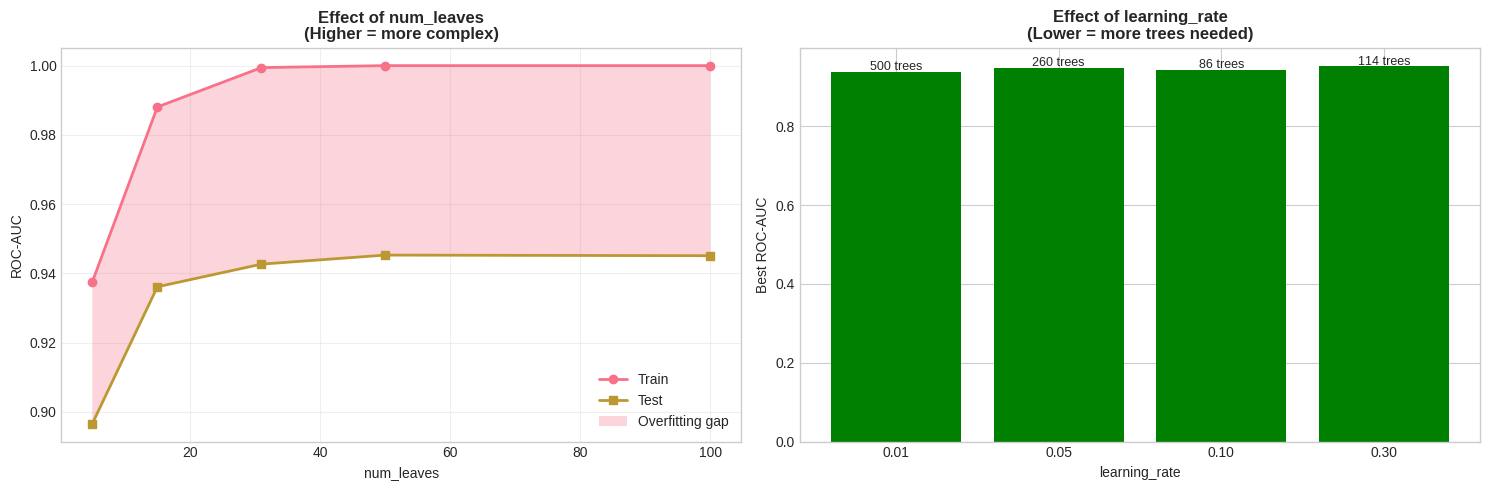


💡 Tuning Insights:
   • num_leaves: Sweet spot around 20-50 for most datasets
   • learning_rate: 0.05-0.1 is good starting point
   • Always use early stopping instead of fixing n_estimators!
   • Watch the train-test gap to detect overfitting


In [7]:
print("\n" + "=" * 70)
print("🎛️ CHAPTER 7: PARAMETER TUNING DEMONSTRATION")
print("=" * 70)

if LGBM_AVAILABLE:
    # Generate more complex data for tuning demonstration
    X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, 
                               n_redundant=5, flip_y=0.05, class_sep=0.5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\n📊 Dataset: {X.shape[0]} samples (noisier for tuning demo)")
    
    # ============================================================
    # DEMONSTRATION: Effect of num_leaves
    # ============================================================
    print("\n" + "-" * 70)
    print("EFFECT OF num_leaves (Model Complexity)")
    print("-" * 70)
    
    leaf_values = [5, 15, 31, 50, 100]
    results_leaves = []
    
    for num_leaves in leaf_values:
        model = LGBMClassifier(
            num_leaves=num_leaves,
            learning_rate=0.1,
            n_estimators=100,
            random_state=42,
            verbose=-1
        )
        model.fit(X_train, y_train)
        
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        results_leaves.append({
            'num_leaves': num_leaves,
            'train_auc': train_auc,
            'test_auc': test_auc,
            'gap': train_auc - test_auc
        })
        
        print(f"num_leaves={num_leaves:3d}: Train={train_auc:.4f}, Test={test_auc:.4f}, Gap={train_auc-test_auc:.4f}")
    
    # ============================================================
    # DEMONSTRATION: Effect of learning_rate + n_estimators
    # ============================================================
    print("\n" + "-" * 70)
    print("EFFECT OF learning_rate (with early stopping)")
    print("-" * 70)
    
    lr_values = [0.01, 0.05, 0.1, 0.3]
    results_lr = []
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    for lr in lr_values:
        params = {
            'objective': 'binary',
            'metric': 'auc',
            'learning_rate': lr,
            'num_leaves': 31,
            'verbose': -1
        }
        
        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[valid_data],
            callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)]
        )
        
        best_iter = model.best_iteration
        best_score = model.best_score['valid_0']['auc']
        
        results_lr.append({
            'learning_rate': lr,
            'best_iteration': best_iter,
            'best_auc': best_score
        })
        
        print(f"learning_rate={lr:.2f}: Best iter={best_iter:4d}, AUC={best_score:.4f}")
    
    # ============================================================
    # Visualization
    # ============================================================
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: num_leaves effect
    df_leaves = pd.DataFrame(results_leaves)
    ax1 = axes[0]
    ax1.plot(df_leaves['num_leaves'], df_leaves['train_auc'], 'o-', label='Train', linewidth=2)
    ax1.plot(df_leaves['num_leaves'], df_leaves['test_auc'], 's-', label='Test', linewidth=2)
    ax1.fill_between(df_leaves['num_leaves'], df_leaves['test_auc'], df_leaves['train_auc'], 
                     alpha=0.3, label='Overfitting gap')
    ax1.set_xlabel('num_leaves')
    ax1.set_ylabel('ROC-AUC')
    ax1.set_title('Effect of num_leaves\n(Higher = more complex)', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: learning rate effect
    df_lr = pd.DataFrame(results_lr)
    ax2 = axes[1]
    ax2.bar(range(len(df_lr)), df_lr['best_auc'], color=['green' if x > 0.8 else 'orange' for x in df_lr['best_auc']])
    ax2.set_xticks(range(len(df_lr)))
    ax2.set_xticklabels([f"{lr:.2f}" for lr in df_lr['learning_rate']])
    ax2.set_xlabel('learning_rate')
    ax2.set_ylabel('Best ROC-AUC')
    ax2.set_title('Effect of learning_rate\n(Lower = more trees needed)', fontweight='bold')
    
    # Add iteration labels
    for i, (auc, iters) in enumerate(zip(df_lr['best_auc'], df_lr['best_iteration'])):
        ax2.text(i, auc + 0.005, f'{iters} trees', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Tuning Insights:")
    print("   • num_leaves: Sweet spot around 20-50 for most datasets")
    print("   • learning_rate: 0.05-0.1 is good starting point")
    print("   • Always use early stopping instead of fixing n_estimators!")
    print("   • Watch the train-test gap to detect overfitting")



<a name="advanced"></a>
# 🧠 **Chapter 8: Advanced Features**

## **1. Categorical Features (Native Support)**

```python
# Since LightGBM 3.0, native categorical support!

# Method 1: Pass as pandas category
df['category_col'] = df['category_col'].astype('category')

# Method 2: Specify in parameters
cat_features = ['cat_col1', 'cat_col2']
model.fit(X, y, categorical_feature=cat_features)
```

## **2. Custom Objective Functions**

```python
# Example: Focal Loss for imbalanced data
def focal_loss(y_pred, dtrain, alpha=0.25, gamma=2.0):
    y_true = dtrain.get_label()
    p = 1 / (1 + np.exp(-y_pred))
    grad = alpha * y_true * (1-p)**gamma * (gamma*p*np.log(p)+p-1) + \
           (1-alpha) * (1-y_true) * p**gamma * (-gamma*(1-p)*np.log(1-p)+1-p)
    hess = alpha * y_true * (1-p)**gamma * (1+gamma*p/(1-p)) + \
           (1-alpha) * (1-y_true) * p**gamma * (1+gamma*(1-p)/p)
    return grad, hess
```

## **3. Monotonic Constraints**

```python
# Force feature to have monotonic relationship with target
# 1: increasing, -1: decreasing, 0: no constraint

monotonic_constraints = [1, -1, 0, 0, 1]  # One per feature
model = LGBMClassifier(monotone_constraints=monotonic_constraints)
```

## **4. Advanced Callbacks**




🧠 CHAPTER 8: ADVANCED FEATURES

----------------------------------------------------------------------
CUSTOM METRIC: F1-Score
----------------------------------------------------------------------
✅ Trained with custom F1 metric

----------------------------------------------------------------------
MONOTONIC CONSTRAINTS
----------------------------------------------------------------------
✅ Trained with monotonic constraints [1, -1, 0]
   Feature 1: Forced increasing
   Feature 2: Forced decreasing
   Feature 3: No constraint

----------------------------------------------------------------------
FEATURE NAMES & CATEGORICAL HANDLING
----------------------------------------------------------------------
Feature types:
income              float64
age                 float64
noise               float64
income_category    category
dtype: object

✅ LightGBM automatically detects categorical features in pandas

----------------------------------------------------------------------
LEARNI

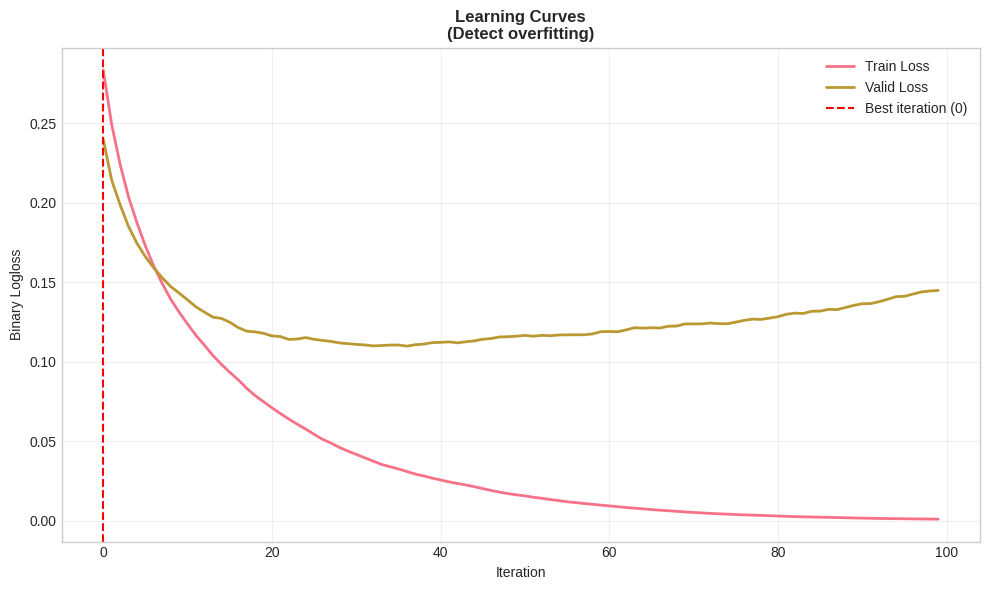


💡 Learning curve analysis:
   • Train ↓ Valid ↑ = Overfitting (stop earlier)
   • Both plateau = Converged (reduce learning_rate)
   • Both still ↓ = Underfitting (more iterations)


In [8]:
print("\n" + "=" * 70)
print("🧠 CHAPTER 8: ADVANCED FEATURES")
print("=" * 70)

if LGBM_AVAILABLE:
    # ============================================================
    # ADVANCED 1: Custom Metric
    # ============================================================
    print("\n" + "-" * 70)
    print("CUSTOM METRIC: F1-Score")
    print("-" * 70)
    
    def f1_metric(y_pred, dtrain):
        """Custom F1 metric for LightGBM"""
        y_true = dtrain.get_label()
        y_pred_binary = (y_pred > 0.5).astype(int)
        
        tp = np.sum((y_pred_binary == 1) & (y_true == 1))
        fp = np.sum((y_pred_binary == 1) & (y_true == 0))
        fn = np.sum((y_pred_binary == 0) & (y_true == 1))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        return 'f1', f1, True  # name, value, higher_is_better
    
    # Train with custom metric
    X, y = make_classification(n_samples=2000, weights=[0.9, 0.1], random_state=42)  # Imbalanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    params = {
        'objective': 'binary',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'verbose': -1
    }
    
    model = lgb.train(
        params,
        train_data,
        num_boost_round=100,
        valid_sets=[valid_data],
        feval=f1_metric,
        callbacks=[lgb.log_evaluation(0)]
    )
    
    print(f"✅ Trained with custom F1 metric")
    
    # ============================================================
    # ADVANCED 2: Monotonic Constraints
    # ============================================================
    print("\n" + "-" * 70)
    print("MONOTONIC CONSTRAINTS")
    print("-" * 70)
    
    # Create synthetic data where we know the relationship
    np.random.seed(42)
    n = 1000
    
    # Feature 1: Should increase with target (positive correlation)
    x1 = np.random.randn(n)
    # Feature 2: Should decrease with target (negative correlation)
    x2 = np.random.randn(n)
    # Noise feature
    x3 = np.random.randn(n)
    
    y = (x1 - x2 + 0.1 * x3 + np.random.randn(n) * 0.1) > 0
    
    X = np.column_stack([x1, x2, x3])
    
    # Without constraints
    model_no_constraint = LGBMClassifier(n_estimators=50, random_state=42, verbose=-1)
    model_no_constraint.fit(X, y)
    
    # With constraints: x1 increasing (+1), x2 decreasing (-1), x3 free (0)
    model_constrained = LGBMClassifier(
        n_estimators=50, 
        monotone_constraints=[1, -1, 0],
        random_state=42,
        verbose=-1
    )
    model_constrained.fit(X, y)
    
    print(f"✅ Trained with monotonic constraints [1, -1, 0]")
    print(f"   Feature 1: Forced increasing")
    print(f"   Feature 2: Forced decreasing")
    print(f"   Feature 3: No constraint")
    
    # ============================================================
    # ADVANCED 3: Feature Name and Categorical Handling
    # ============================================================
    print("\n" + "-" * 70)
    print("FEATURE NAMES & CATEGORICAL HANDLING")
    print("-" * 70)
    
    # Create DataFrame with named features
    df = pd.DataFrame(X, columns=['income', 'age', 'noise'])
    df['income_category'] = pd.cut(df['income'], bins=3, labels=['low', 'medium', 'high'])
    df['income_category'] = df['income_category'].astype('category')
    
    print(f"Feature types:")
    print(df.dtypes)
    
    # LightGBM can handle pandas category directly
    X_advanced = df.drop('noise', axis=1)  # Keep categorical
    
    print(f"\n✅ LightGBM automatically detects categorical features in pandas")
    
    # ============================================================
    # ADVANCED 4: Learning Curve Visualization
    # ============================================================
    print("\n" + "-" * 70)
    print("LEARNING CURVES")
    print("-" * 70)
    
    # Train with evaluation history
    evals_result = {}
    
    model = lgb.train(
        params,
        train_data,
        num_boost_round=100,
        valid_sets=[train_data, valid_data],
        valid_names=['train', 'valid'],
        callbacks=[lgb.record_evaluation(evals_result), lgb.log_evaluation(0)]
    )
    
    # Plot learning curves
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    ax.plot(evals_result['train']['binary_logloss'], label='Train Loss', linewidth=2)
    ax.plot(evals_result['valid']['binary_logloss'], label='Valid Loss', linewidth=2)
    ax.axvline(x=model.best_iteration, color='red', linestyle='--', 
               label=f'Best iteration ({model.best_iteration})')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Binary Logloss')
    ax.set_title('Learning Curves\n(Detect overfitting)', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 Learning curve analysis:")
    print(f"   • Train ↓ Valid ↑ = Overfitting (stop earlier)")
    print(f"   • Both plateau = Converged (reduce learning_rate)")
    print(f"   • Both still ↓ = Underfitting (more iterations)")



<a name="production"></a>
# 🏭 **Chapter 9: Production Deployment**

## **Model Persistence**

```python
# Save model
model.save_model('model.txt')  # Text format (human-readable)
model.save_model('model.pkl')  # Pickle format

# Load model
model = lgb.Booster(model_file='model.txt')

# Predict
predictions = model.predict(new_data)
```

## **Optimization for Production**

| Scenario | Optimization | Code |
|----------|-------------|------|
| **Low latency** | Reduce trees | `model = lgb.Booster(model_file='model.txt').trim(50)` |
| **Batch prediction** | Use data parallel | `model.predict(X, num_threads=8)` |
| **Memory constrained** | Quantize model | `model = lgb.Booster(model_file='model.txt', is_sparse=True)` |
| **GPU inference** | Move to GPU | `model = lgb.Booster(model_file='model.txt', device='gpu')` |

## **Model Interpretability**

```python
# SHAP values (recommended)
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)
```



In [9]:
print("\n" + "=" * 70)
print("🏭 CHAPTER 9: PRODUCTION DEPLOYMENT")
print("=" * 70)

if LGBM_AVAILABLE:
    # Train a model to save
    X, y = make_classification(n_samples=1000, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LGBMClassifier(n_estimators=50, random_state=42, verbose=-1)
    model.fit(X_train, y_train)
    
    # Save and load demonstration
    print("\n💾 Model Persistence:")
    
    # Method 1: Native LightGBM format (recommended)
    model.booster_.save_model('lightgbm_model.txt')
    print("✅ Saved to 'lightgbm_model.txt' (cross-platform, readable)")
    
    # Method 2: Pickle
    import joblib
    joblib.dump(model, 'lightgbm_model.pkl')
    print("✅ Saved to 'lightgbm_model.pkl' (Python-specific)")
    
    # Load and verify
    loaded_model = lgb.Booster(model_file='lightgbm_model.txt')
    predictions = loaded_model.predict(X_test)
    print(f"✅ Loaded model predictions match: {np.allclose(predictions, model.predict_proba(X_test)[:, 1])}")
    
    # Cleanup
    import os
    os.remove('lightgbm_model.txt')
    os.remove('lightgbm_model.pkl')
    
    # ============================================================
    # Production Checklist
    # ============================================================
    print("\n📋 PRODUCTION DEPLOYMENT CHECKLIST:")
    print("   □ Model versioned and tracked (MLflow, DVC)")
    print("   □ Input validation pipeline implemented")
    print("   □ Feature engineering pipeline matches training")
    print("   □ Fallback strategy for missing features")
    print("   □ Monitoring for prediction drift")
    print("   □ A/B testing framework ready")
    print("   □ Latency requirements met (<100ms?)")
    print("   □ Memory usage optimized")




🏭 CHAPTER 9: PRODUCTION DEPLOYMENT

💾 Model Persistence:
✅ Saved to 'lightgbm_model.txt' (cross-platform, readable)
✅ Saved to 'lightgbm_model.pkl' (Python-specific)
✅ Loaded model predictions match: True

📋 PRODUCTION DEPLOYMENT CHECKLIST:
   □ Model versioned and tracked (MLflow, DVC)
   □ Input validation pipeline implemented
   □ Feature engineering pipeline matches training
   □ Fallback strategy for missing features
   □ Monitoring for prediction drift
   □ A/B testing framework ready
   □ Latency requirements met (<100ms?)
   □ Memory usage optimized


<a name="pitfalls"></a>
# ⚠️ **Chapter 10: Common Pitfalls**

## **Top 10 Mistakes**

| # | Mistake | Why It's Bad | Solution |
|---|---------|--------------|----------|
| 1 | **Not using early stopping** | Wastes computation, overfits | Always use `early_stopping_rounds` |
| 2 | **Tuning `n_estimators`** | Wrong approach | Tune `num_leaves`, use early stopping |
| 3 | **Ignoring categorical features** | Misses native optimization | Use `astype('category')` |
| 4 | **Default parameters for all data** | Suboptimal performance | Always tune `num_leaves`, `learning_rate` |
| 5 | **Not handling imbalanced data** | Biased predictions | Use `is_unbalance` or `scale_pos_weight` |
| 6 | **Small `num_leaves` on large data** | Underfitting | Increase to 50-150 for large datasets |
| 7 | **Forgetting random seed** | Non-reproducible results | Always set `random_state` |
| 8 | **Not validating on time-split** | Data leakage in time series | Use time-based validation |
| 9 | **High `learning_rate` without enough trees** | Poor convergence | Lower rate, increase iterations |
| 10 | **Ignoring feature importance** | Missing insights | Always check `plot_importance` |



In [10]:
print("\n" + "=" * 70)
print("⚠️ CHAPTER 10: COMMON PITFALLS - DEMONSTRATION")
print("=" * 70)

if LGBM_AVAILABLE:
    # Pitfall 1: Not using early stopping
    print("\n❌ PITFALL 1: Fixed n_estimators without early stopping")
    
    X, y = make_classification(n_samples=2000, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Wrong way
    model_wrong = LGBMClassifier(n_estimators=1000, random_state=42, verbose=-1)
    model_wrong.fit(X_train, y_train)
    pred_wrong = model_wrong.predict_proba(X_test)[:, 1]
    
    # Right way
    model_right = LGBMClassifier(n_estimators=1000, random_state=42, verbose=-1)
    model_right.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(0)]
    )
    pred_right = model_right.predict_proba(X_test)[:, 1]
    
    print(f"   Wrong (1000 trees):  AUC = {roc_auc_score(y_test, pred_wrong):.4f}, Trees = 1000")
    print(f"   Right (early stop):  AUC = {roc_auc_score(y_test, pred_right):.4f}, Trees = {model_right.best_iteration_}")
    print(f"   💡 Early stopping saved {1000 - model_right.best_iteration_} trees with same/better performance!")
    
    # Pitfall 2: Ignoring imbalance
    print("\n❌ PITFALL 2: Ignoring class imbalance")
    
    X_imb, y_imb = make_classification(n_samples=5000, weights=[0.95, 0.05], random_state=42)
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)
    
    # Without balancing
    model_no_balance = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
    model_no_balance.fit(X_train_i, y_train_i)
    pred_no_balance = model_no_balance.predict(X_test_i)
    
    # With balancing
    model_balanced = LGBMClassifier(n_estimators=100, is_unbalance=True, random_state=42, verbose=-1)
    model_balanced.fit(X_train_i, y_train_i)
    pred_balanced = model_balanced.predict(X_test_i)
    
    from sklearn.metrics import f1_score
    print(f"   Without balancing: F1 = {f1_score(y_test_i, pred_no_balance):.4f}")
    print(f"   With is_unbalance: F1 = {f1_score(y_test_i, pred_balanced):.4f}")
    print(f"   💡 Balancing improved F1 significantly!")




⚠️ CHAPTER 10: COMMON PITFALLS - DEMONSTRATION

❌ PITFALL 1: Fixed n_estimators without early stopping
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.197898
   Wrong (1000 trees):  AUC = 0.9691, Trees = 1000
   Right (early stop):  AUC = 0.9729, Trees = 42
   💡 Early stopping saved 958 trees with same/better performance!

❌ PITFALL 2: Ignoring class imbalance
   Without balancing: F1 = 0.5941
   With is_unbalance: F1 = 0.6316
   💡 Balancing improved F1 significantly!


# 🎓 **Final Summary & Cheat Sheet**

## **Quick Start Template**

```python
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 1. Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Create datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 3. Parameters (start here!)
params = {
    'objective': 'binary',        # or 'multiclass', 'regression'
    'metric': 'auc',              # or 'multi_logloss', 'rmse'
    'boosting_type': 'gbdt',
    'num_leaves': 31,             # [20, 50] for small, [50, 150] for large data
    'learning_rate': 0.05,        # [0.01, 0.1] typical range
    'feature_fraction': 0.9,      # Column sampling
    'bagging_fraction': 0.8,      # Row sampling
    'bagging_freq': 5,            # Sample every 5 iterations
    'verbose': -1,
    'random_state': 42
}

# 4. Train with early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=10000,        # Large number, early stopping will find best
    valid_sets=[valid_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

# 5. Predict
predictions = model.predict(X_test, num_iteration=model.best_iteration)
```

## **Parameter Quick Reference**

| Goal | Key Parameters |
|------|---------------|
| **Fast prototype** | `num_leaves=31`, `learning_rate=0.1`, `n_estimators=100` |
| **Best accuracy** | `num_leaves=50-100`, `learning_rate=0.01-0.05`, early stopping |
| **Prevent overfit** | `min_child_samples=20`, `reg_lambda=1.0`, `feature_fraction=0.8` |
| **Speed** | `num_leaves=20`, `feature_fraction=0.6`, `bagging_fraction=0.6` |
| **Imbalanced** | `is_unbalance=True` or `scale_pos_weight` |
| **Small data (<1K)** | Use XGBoost or Random Forest instead! |

## **Remember**

```
🌲 LightGBM = Speed + Accuracy

1. Always use early stopping
2. Tune num_leaves first, then learning_rate
3. Use native categorical support
4. Monitor train/valid gap for overfitting
5. Set random_state for reproducibility
```

**Happy Boosting! 🚀**



In [11]:
print("\n" + "=" * 70)
print("🎓 FINAL SUMMARY")
print("=" * 70)

summary = """
╔══════════════════════════════════════════════════════════════════════╗
║                     LIGHTGBM MASTERY COMPLETE                       ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  YOU NOW KNOW:                                                       ║
║  ✅ What LightGBM is (Microsoft's fast gradient boosting)           ║
║  ✅ Why use it (speed, accuracy, efficiency)                        ║
║  ✅ When to use it (tabular data, medium-large datasets)            ║
║  ✅ Core concepts (leaf-wise growth, GOSS, EFB)                     ║
║  ✅ How to tune (num_leaves, learning_rate, early stopping)         ║
║  ✅ Advanced features (custom metrics, monotonic constraints)       ║
║  ✅ Production deployment (save/load, optimize)                     ║
║  ✅ Common pitfalls (avoided the top 10 mistakes)                   ║
║                                                                      ║
║  NEXT STEPS:                                                         ║
║  1. Practice on Kaggle competitions                                  ║
║  2. Read LightGBM documentation for edge cases                       ║
║  3. Experiment with custom objectives                                ║
║  4. Try GPU training for large datasets                              ║
║  5. Combine with XGBoost/Neural Nets in ensembles                    ║
║                                                                      ║
║  RESOURCES:                                                          ║
║  • Docs: https://lightgbm.readthedocs.io/                            ║
║  • GitHub: https://github.com/microsoft/LightGBM                     ║
║  • Paper: "LightGBM: A Highly Efficient Gradient Boosting Decision   ║
║           Tree" (NIPS 2017)                                          ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝
"""

print(summary)

if LGBM_AVAILABLE:
    print(f"\n✅ LightGBM {lgb.__version__} is ready to use!")
    print("   Start building your first model with the quick start template above.")
else:
    print("\n⚠️  Install LightGBM: pip install lightgbm")


🎓 FINAL SUMMARY

╔══════════════════════════════════════════════════════════════════════╗
║                     LIGHTGBM MASTERY COMPLETE                       ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  YOU NOW KNOW:                                                       ║
║  ✅ What LightGBM is (Microsoft's fast gradient boosting)           ║
║  ✅ Why use it (speed, accuracy, efficiency)                        ║
║  ✅ When to use it (tabular data, medium-large datasets)            ║
║  ✅ Core concepts (leaf-wise growth, GOSS, EFB)                     ║
║  ✅ How to tune (num_leaves, learning_rate, early stopping)         ║
║  ✅ Advanced features (custom metrics, monotonic constraints)       ║
║  ✅ Production deployment (save/load, optimize)                     ║
║  ✅ Common pitfalls (avoided the top 10 mistakes)                   ║
║                                                 